In [1]:
import pandas as pd
import seaborn as sn

In [3]:
df = pd.read_csv('heights.csv')
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<AxesSubplot:ylabel='Count'>

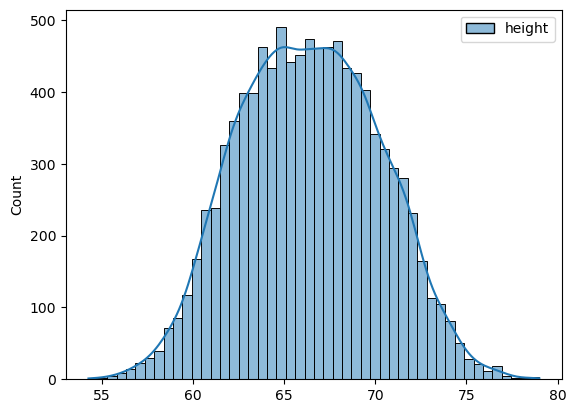

In [5]:
sn.histplot(df, kde=True)

In [6]:
mean = df.height.mean()
standard_deviation = df.height.std()

In [7]:
df_no_outlier = df[(df.height >= (mean - 3*standard_deviation)) & (df.height <= (mean + 3*standard_deviation))]

In [8]:
df_no_outlier.describe()

,height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


### Normal Distribution
<img src="normal_distribution.png">

### Z Score 
How many standard deviations away a datapoint is from mean


<img src="z_score.png">

In [10]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [11]:
df_no_outlier = df[(df.zscore >= -3) & (df.zscore <= 3)]
df_no_outlier.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [12]:
df_no_outlier.shape

(9993, 3)

# Exercise

In [1]:
import pandas as pd
import seaborn as sn

In [2]:
df = pd.read_csv('bhp.csv')
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [4]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [5]:
df_old = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]
df_old.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [11]:
std = df_old.price_per_sqft.std()
mean = df_old.price_per_sqft.mean()
df_no_outlier = df_old[(df_old.price_per_sqft >= (mean - 4*std)) & (df_old.price_per_sqft <= (mean + 4*std))]

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

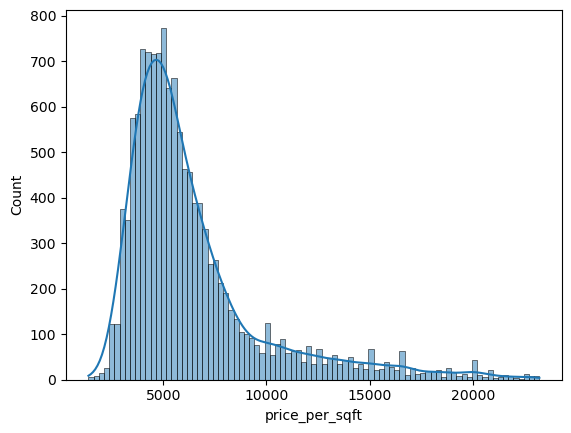

In [12]:
sn.histplot(df_no_outlier.price_per_sqft, kde=True)

In [13]:
df_old['zscore'] = (df_old.price_per_sqft - mean)/std
df_old.head()

/var/folders/k1/sbk9h5_s3lq94lzxsqdp10yr0000gn/T/ipykernel_38561/4062951830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old['zscore'] = (df_old.price_per_sqft - mean)/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [18]:
df_zscore = df_old[(df_old.zscore >= -4) & (df_old.zscore <= 4)]

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

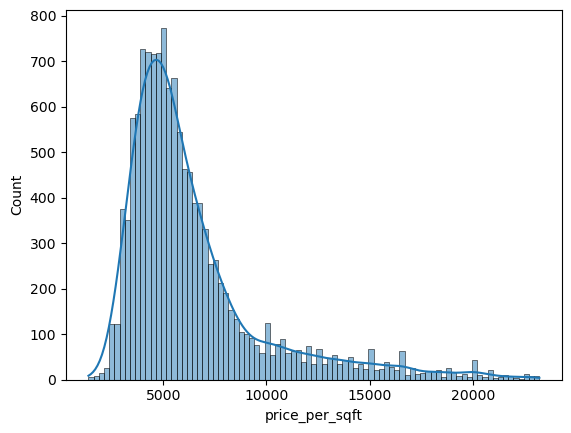

In [19]:
sn.histplot(df_zscore.price_per_sqft, kde=True)